# Exploratory Data Analysis for Employee Attrition

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
import joblib

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Prepare the Dataset
1. Read Excel file
2. Label data for employees who departed (1) and employees who remain (0)
3. Concatenate dataframes to one dataset

In [2]:
excelfile = pd.ExcelFile("../case_study.xlsx")

In [3]:
existing_df = excelfile.parse('Existing employees')
existing_df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [4]:
departed_df = excelfile.parse("Employees who have left")
departed_df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [5]:
existing_df['attrition'] = 0
existing_df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition
0,2001,0.58,0.74,4,215,3,0,0,sales,low,0
1,2002,0.82,0.67,2,202,3,0,0,sales,low,0
2,2003,0.45,0.69,5,193,3,0,0,sales,low,0
3,2004,0.78,0.82,5,247,3,0,0,sales,low,0
4,2005,0.49,0.60,3,214,2,0,0,sales,low,0


In [6]:
departed_df['attrition'] = 1
departed_df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition
0,1,0.38,0.53,2,157,3,0,0,sales,low,1
1,2,0.80,0.86,5,262,6,0,0,sales,medium,1
2,3,0.11,0.88,7,272,4,0,0,sales,medium,1
3,4,0.72,0.87,5,223,5,0,0,sales,low,1
4,5,0.37,0.52,2,159,3,0,0,sales,low,1


In [7]:
data = pd.concat([existing_df, departed_df], ignore_index=True)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition
0,8313,0.83,0.51,4,215,3,0,0,product_mng,high,0
1,12433,0.44,0.51,2,150,3,0,0,support,low,1
2,11479,0.57,0.78,3,134,3,0,0,RandD,medium,0
3,10827,0.87,0.48,4,264,3,0,0,IT,medium,0
4,9449,0.97,0.91,2,112,5,0,0,IT,low,0


In [8]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  attrition              14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [10]:
data.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,attrition
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [11]:
data.describe(include = ['O'])

,dept,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [12]:
data.drop(labels=['Emp ID'], axis=1, inplace=True)

In [13]:
data.to_csv('attrition.csv', index=False)

## Data Exploration

In [14]:
target = 'attrition'

In [15]:
vars_num = [c for c in data.columns if data[c].dtypes!='O' and c!=target]

vars_cat = [c for c in data.columns if data[c].dtypes=='O']

print('Number of numerical variables: {}'.format(len(vars_num)))
print('Number of categorical variables: {}'.format(len(vars_cat)))

Number of numerical variables: 7
Number of categorical variables: 2


### Find missing values

In [16]:
# first in numerical variables

data[vars_num].isnull().mean()

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
promotion_last_5years    0.0
dtype: float64

In [17]:
# now in categorical variables

data[vars_cat].isnull().mean()

dept      0.0
salary    0.0
dtype: float64

### Determine Cardinality in categorical features

In [18]:
data[vars_cat].nunique()

dept      10
salary     3
dtype: int64

### Determine distribution of numerical features

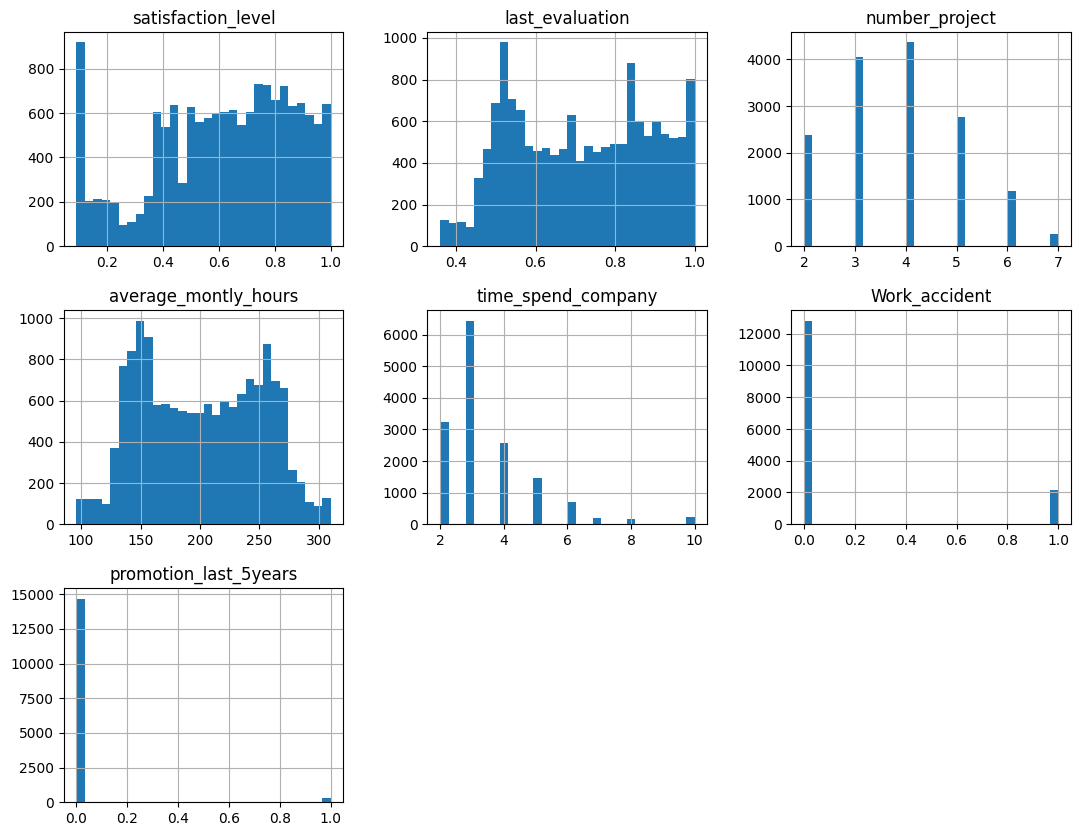

In [19]:
data[vars_num].hist(bins=30, figsize=(13,10))
plt.show()

### Separate data into train and test

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(target, axis=1),  # predictors
    data[target],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((11999, 9), (3000, 9))

## Feature Engineering

### Find and remove rare labels in categorical features

Removing labels present in less than 5% of the passengers

In [21]:
def find_frequent_labels(df, var, rare_perc):
    
    # function finds the labels that are shared by more than
    # a certain % of the employees in the dataset
    
    df = df.copy()
    
    tmp = df.groupby(var)[var].count() / len(df)
    
    return tmp[tmp > rare_perc].index


for var in vars_cat:
    
    # find the frequent categories
    frequent_ls = find_frequent_labels(X_train, var, 0.05)
    
    # replace rare categories by the string "Rare"
    X_train[var] = np.where(X_train[var].isin(
        frequent_ls), X_train[var], 'Rare')
    
    X_test[var] = np.where(X_test[var].isin(
        frequent_ls), X_test[var], 'Rare')

In [22]:
X_train[vars_cat].nunique()

dept      9
salary    3
dtype: int64

In [23]:
X_test[vars_cat].nunique()

dept      9
salary    3
dtype: int64

### Perform one hot encoding of categorical variables into k-1 binary variables

Also dropping the original categorical variable after the encoding

In [24]:
for var in vars_cat:
    
    # to create the binary variables, we use get_dummies from pandas
    
    X_train = pd.concat([X_train,
                         pd.get_dummies(X_train[var], prefix=var, drop_first=True)
                         ], axis=1)
    
    X_test = pd.concat([X_test,
                        pd.get_dummies(X_test[var], prefix=var, drop_first=True)
                        ], axis=1)
    

X_train.drop(labels=vars_cat, axis=1, inplace=True)
X_test.drop(labels=vars_cat, axis=1, inplace=True)

X_train.shape, X_test.shape

((11999, 17), (3000, 17))

In [25]:
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_RandD,dept_Rare,dept_accounting,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_low,salary_medium
12766,0.64,0.94,3,221,2,0,0,0,0,0,0,0,1,0,0,1,0
3536,0.98,0.91,3,188,4,0,0,0,0,1,0,0,0,0,0,0,1
10295,0.69,0.95,3,126,6,0,0,0,0,0,0,0,0,0,1,1,0
2137,0.66,0.80,4,192,3,0,0,0,1,0,0,0,0,0,0,0,1
14774,0.84,0.97,4,253,2,1,0,0,0,0,0,0,1,0,0,1,0


In [26]:
X_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_RandD,dept_Rare,dept_accounting,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_low,salary_medium
1670,0.87,0.64,3,187,2,0,0,0,0,0,0,0,0,0,1,0,1
13378,0.89,0.55,3,260,2,0,0,1,0,0,0,0,0,0,0,1,0
10233,0.71,0.84,3,139,2,0,0,0,1,0,0,0,0,0,0,1,0
4719,0.84,0.61,5,202,3,0,0,0,0,0,0,0,0,1,0,0,0
7003,0.42,0.94,5,227,5,0,0,0,0,0,0,0,1,0,0,0,1


In [27]:
# Create a features variable

features = [c  for c in X_train.columns]

features

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'dept_RandD',
 'dept_Rare',
 'dept_accounting',
 'dept_marketing',
 'dept_product_mng',
 'dept_sales',
 'dept_support',
 'dept_technical',
 'salary_low',
 'salary_medium']

### Scale the features

Use Standard Scaler from Scikit-learn

In [29]:
# create scaler
scaler = StandardScaler()

#  fit  the scaler to the train set
scaler.fit(X_train[features]) 

# transform the train and test set
X_train = scaler.transform(X_train[features])

X_test = scaler.transform(X_test[features])

### Train Logistic Regression model

With Regularization parameter set to 0.0005 and seed 0

In [30]:
# set up the model
# remember to set the random_state / seed

model = LogisticRegression(C=0.0005, random_state=0)

# train the model
model.fit(X_train, y_train)

LogisticRegression(C=0.0005, random_state=0)

### Make predictions and evaluate model performance

Determining the Area under the Curve (`roc_auc`) and the `accuracy` metrics

In [31]:
# make predictions for test set
class_ = model.predict(X_train)
pred = model.predict_proba(X_train)[:,1]

# determine roc_auc and accuracy
print('train roc-auc: {}'.format(roc_auc_score(y_train, pred)))
print('train accuracy: {}'.format(accuracy_score(y_train, class_)))
print()

# make predictions for test set
class_ = model.predict(X_test)
pred = model.predict_proba(X_test)[:,1]

# determine roc_auc and accuracy
print('test roc-auc: {}'.format(roc_auc_score(y_test, pred)))
print('test accuracy: {}'.format(accuracy_score(y_test, class_)))
print()

train roc-auc: 0.8063670284582709
train accuracy: 0.7816484707058922

test roc-auc: 0.8135549106783617
test accuracy: 0.7913333333333333

